# Obrázky
Soubory obsahující obrazová data.

Následující příkaz nainstaluje do vašeho počítače všechny potřebné python knihovny:

In [1]:
import sys
#sys.path.append('../../')
!{sys.executable} -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


Importování knihoven:

In [2]:
from signal_tools import *

## Převod z formátu png do bmp
Z internetu jsme si stáhli obrázek s texturepackem jedné ze starších verzí hry Minecraft. Nejdříve jej převedem z formátu `png` do `bmp`. Tato konverze není nutná, protože jak png, tak bmp jsou formáty bez ztráty kvality, ale bmp je jednodušší datový formát a zároveň si takto procvičíme konverzi formátů.

In [3]:
assets_folder = "assets/"
texture_pack = "minecraft-textures-27632"

In [4]:
# convert a .png image file to a .bmp image file using PIL.Image
file_in = assets_folder+texture_pack+".png"
file_out = assets_folder+texture_pack+".bmp"

img = Image.open(file_in)
img.save(file_out)

## Zobrazení obrázku

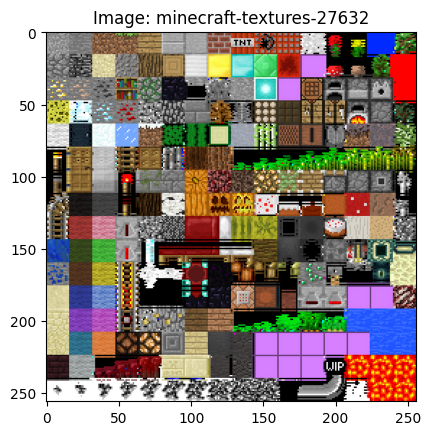

Image shape: (256, 256, 3)


In [5]:
# load the .bmp image file using PIL.Image to a numpy array
img = np.array(Image.open(file_out))

# display the image using matplotlib.pyplot
plt.imshow(img)
plt.title("Image: " + texture_pack)
plt.show()

# Print info
print("Image shape:", img.shape)


Všiměte si že osa y je obrácená, protože v počítačové grafice se počátek souřadnic nachází v levém horním rohu a osa y směřuje dolů.

## Vybrání výřezu obrázku
Rozmer jednoho bloku je 16x16 pixelů.

Následující kód umožnuje vybrat libovolný blok, když zadáme index do tuplu: `block_index`.

In [6]:
def get_block_texture(img, block_index: tuple=(0,0), block_size: int=16):
    start_x = block_index[0] * block_size
    start_y = block_index[1] * block_size
    stop_x = start_x + block_size
    stop_y = start_y + block_size

    return img[start_y:stop_y, start_x:stop_x]

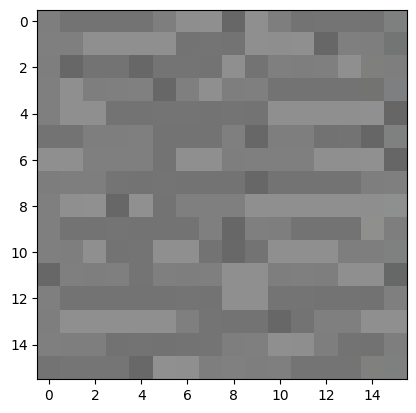

In [7]:
block_size = 16
block_index = (1, 0)

# get the block texture from the texture pack
block_texture = get_block_texture(img, block_index, block_size)

# display the block texture using matplotlib.pyplot
plt.imshow(block_texture)


### Jak je kódovaná barva v obrázku?
Nechali jsme si zobrazit obrázek kamene, ten je černobílý. Jak je ale uložená informace o barvě v obrázku? Každý pixel je reprezentován třemi hodnotami: červená, zelená a modrá. Tyto hodnoty se nazývají RGB hodnoty. V obrázku kamene jsou všechny tři hodnoty stejné, protože je černobílý.

Tedy obrázek o rozměrech 16x16 pixelů je reprezentován jako 16x16x3 pole hodnot.

In [8]:
print("Block texture shape:", block_texture.shape)

Block texture shape: (16, 16, 3)


In [9]:
print("Block texture values:")

for row in block_texture:
    for pixel in row:
        R, G, B = pixel
        ansi_red = AnsiColor().intensity(R).red().background().get()
        ansi_green = AnsiColor().intensity(G).green().background().get()
        ansi_blue= AnsiColor().intensity(B).blue().background().get()
        print(f"[{ansi_red}{R}{Reset};", end="")
        print(f"{ansi_green}{G}{Reset};", end="")
        print(f"{ansi_blue}{B}{Reset}]", end="")
    print()

Block texture values:
[126;126;126][115;115;115][115;115;115][115;115;115][115;115;115][126;126;126][142;142;142][143;143;143][103;103;103][143;143;143][126;126;126][115;115;115][116;116;116][116;116;116][116;115;115][126;127;127]
[127;127;127][127;127;127][143;143;143][143;143;143][143;143;143][143;143;143][115;115;115][116;116;116][115;115;115][143;143;143][142;142;142][143;143;143][103;103;103][127;127;127][127;126;126][115;116;116]
[126;126;126][103;103;103][115;115;115][115;115;115][103;103;103][116;116;116][116;116;116][115;115;115][143;143;143][115;115;115][127;127;127][126;126;126][127;127;127][143;143;143][127;127;126][126;126;127]
[127;127;127][143;143;143][126;126;126][127;127;127][128;128;128][103;103;103][127;127;127][143;143;143][126;126;126][127;127;127][115;115;115][115;115;115][115;115;115][115;115;115][115;115;114][126;127;128]
[127;127;127][143;143;143][143;143;143][115;115;115][115;115;115][116;116;116][116;116;116][115;115;115][116;116;116][115;115;115][143;143;143

Mužeme tedý tento tříkanálový obrázek převést na černobílý obrázek, kdy každý pixel bude mít pouze jednu hodnotu. Lze to udělat například tak, že se sečtou hodnoty všech tří kanálů a vydělí se třemi (průměr, funkce -> `mean`).

Výsledný obrázek by měl být praktický identický, jako původní obrázek, ale bude mít pouze jednu hodnotu pro každý pixel a tedy třikrát menší velikost.

Block texture shape: (16, 16)
Mean block texture values:
[[126 115 115 115 115 126 142 143 103 143 126 115 116 116 115 126]
 [127 127 143 143 143 143 115 116 115 143 142 143 103 127 126 115]
 [126 103 115 115 103 116 116 115 143 115 127 126 127 143 126 126]
 [127 143 126 127 128 103 127 143 126 127 115 115 115 115 114 127]
 [127 143 143 115 115 116 116 115 116 115 143 143 143 143 144 102]
 [115 115 126 126 127 115 115 115 127 103 126 126 114 115 102 127]
 [143 143 127 127 127 115 143 143 126 127 127 127 143 143 144 102]
 [125 126 126 116 115 116 115 115 115 103 115 115 115 115 126 127]
 [127 143 144 103 144 115 127 127 127 143 143 143 143 143 142 142]
 [127 115 115 116 115 115 115 127 103 127 126 115 115 115 142 126]
 [127 126 143 115 116 143 143 115 104 115 143 143 143 126 126 127]
 [103 127 126 127 116 127 126 127 143 143 126 127 126 143 143 102]
 [127 115 115 115 115 115 116 115 143 143 116 116 115 115 114 127]
 [126 143 143 143 143 143 127 116 115 115 103 115 127 127 143 143]
 [127

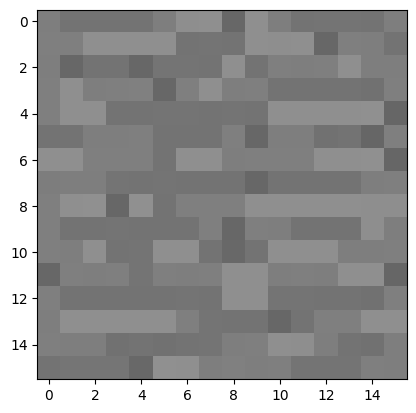

In [10]:
gray = np.mean(block_texture, axis=2, dtype=int).astype(np.uint8)

print("Block texture shape:", gray.shape)
print("Mean block texture values:")
print(gray)

# print gray picture
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

In [14]:
# Předpokládáme, že Red, Green, Blue jsou již definovány
print("Block texture values:")

for row in gray:
    for intensity in row:
        ansi_gray = AnsiColor(intensity).gray().background().get()
        print(f"{ansi_gray}{intensity:>3}{Reset}", end="")
    print()

Block texture values:
126115115115115126142143103143126115116116115126
127127143143143143115116115143142143103127126115
126103115115103116116115143115127126127143126126
127143126127128103127143126127115115115115114127
127143143115115116116115116115143143143143144102
115115126126127115115115127103126126114115102127
143143127127127115143143126127127127143143144102
125126126116115116115115115103115115115115126127
127143144103144115127127127143143143143143142142
127115115116115115115127103127126115115115142126
127126143115116143143115104115143143143126126127
103127126127116127126127143143126127126143143102
127115115115115115116115143143116116115115114127
126143143143143143127116115115103115127127143143
127126126114115114115116126127143142126115114126
115117117117104144143126128126127116116116127126


### Barevný obrázek
Vybrali jsme obrázek trávy.

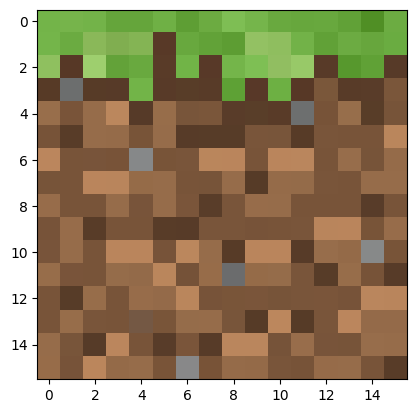

In [12]:
block_index = (3, 0)

# get the block texture from the texture pack

block_texture = get_block_texture(img, block_index)

# display the block texture using matplotlib.pyplot
plt.imshow(block_texture)